In [129]:
import numpy as np
import matplotlib.pyplot as plt

In [130]:
def gradient_descent(a:int,b:int,lr:int,X:np.array,Y:np.array,n,max_steps:int,cost_func,grad_decr):
    """
    a,b : coeffs. inputs a,b are the initial coeffs which are assumed
    lr : learning rate
    X,Y : x,y values of points
    n : number of points
    Ɛ ~= 0 (some small value close to 0)

    returns : a,b
    """
    costs = []
    Ɛ = 10**-1
    cost = 1000
    for step in range(max_steps):
        a_prev,b_prev,cost_prev = a,b,cost
        
        Y_pred = a*X - b
        decr_a,decr_b = grad_decr(n,Y,Y_pred,X)

        a = a_prev - lr*decr_a
        b = b_prev - lr*decr_b

        cost = cost_func(X,Y,n,a,b)
        costs.append(cost)
        print(cost)
        if (cost)**2 < Ɛ: #  (a_prev -a)**2 + (b_prev-b)**2 
            break
    
    plt.scatter([_ for _ in range(len(costs))],costs)
    plt.title("value of cost function over time")
    plt.show()

    return a,b

In [131]:
def mse(x:np.array,y:np.array,n:int,a:float,b:float):
    return (1/n)*np.sum((y-(a*x+b))**2)

In [132]:
def r_squared(x:np.array,y:np.array,n:int,a:float,b:float):
    y_mean = np.sum(y)/n
    rss = np.sum((y-(a*x+b))**2)
    tss = np.sum((y-y_mean)**2)

    return 1 - rss/tss

In [133]:
def grad_decr_least_squares(n,Y,Y_pred,X):
    return \
        (-2/n)*np.sum((Y-Y_pred)*X), \
        (2/n)*np.sum(Y-Y_pred)

In [134]:
def grad_decr_r_squared(n,Y,Y_pred,X):
    y_mean = np.sum(Y)/n
    tss = np.sum((Y-y_mean)**2)

    return \
        (-2/tss)*np.sum((Y-Y_pred)*X), \
        (2/tss)*np.sum(Y-Y_pred)

In [135]:
X = np.array([1,2,3,4,5])
Y = np.array([2,4,6,8,10])

In [136]:
a,b = 0,-1
lr = 0.01
n = len(X)
max_steps = 1000

-5.852676562499999
-5.593466119394532
-5.346685860541127
-5.111690329608139
-4.8878693202751915
-4.674645892848508
-4.471474504339144
-4.277839245455373
-4.093252178340132
-3.917251769242249
-3.7494014106469233
-3.589288027708304
-3.4365207641258753
-3.29072974288784
-3.1515648975698243
-3.0186948701269927
-2.8918059713528637
-2.7706012003997005
-2.654799319964032
-2.5441339839374364
-2.438352914507898
-2.3372171258714203
-2.240500191877898
-2.147987555089973
-2.0594758748793693
-1.9747724123225048
-1.893694449786517
-1.8160687432186697
-1.7417310052668578
-1.670525417467061
-1.6023041698354041
-1.53692702629843
-1.4742609144855527
-1.4141795384927875
-1.356563013307043
-1.301297519655832
-1.2482749781183875
-1.1973927414012415
-1.1485533037445017
-1.1016640264845075
-1.056636878854687
-1.0133881931591646
-0.9718384335034984
-0.9319119773137536
-0.8935369089193013
-0.8566448245163472
-0.8211706478683893
-0.7870524561367394
-0.7542313152690496
-0.7226511244065805
-0.6922584688018241
-0.

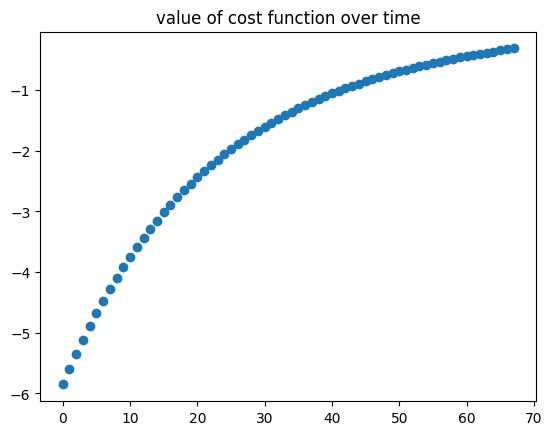

In [137]:
a,b = gradient_descent(a,b,lr,X,Y,n,max_steps,cost_func=r_squared,grad_decr=grad_decr_r_squared)

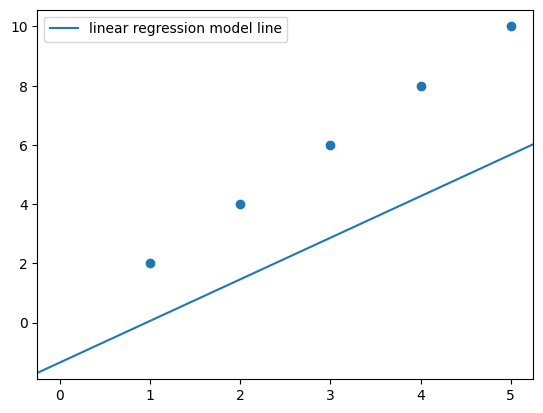

In [138]:
fig,ax  = plt.subplots()
ax.scatter(X,Y)
ax.axline((0,b),slope=a,color='C0',label='linear regression model line')

ax.legend()

plt.show()